In [1]:
# G train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [4]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [17]:
# look at G line only
G_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('G')]

In [18]:
# look at all station names
G_train_all['STATION'].unique()

array(['15 ST-PROSPECT', '21 ST', '4 AV-9 ST', '42 ST-PORT AUTH',
       '4AV-9 ST', '7 AV', 'BEDFORD-NOSTRAN', 'BERGEN ST', 'BROADWAY',
       'CARROLL ST', 'CHURCH AV', 'CLASSON AV', 'CLINTON-WASH AV',
       'COURT SQ', 'COURT SQ-23 ST', 'FLUSHING AV', 'FT HAMILTON PKY',
       'FULTON ST', 'GREENPOINT AV', 'HOYT-SCHER', 'LORIMER ST',
       'METROPOLITAN AV', 'MYRTLE-WILLOUGH', 'NASSAU AV', 'SMITH-9 ST'],
      dtype=object)

In [19]:
# check station count
G_train_all['STATION'].count()

25

In [20]:
# clean station names
# needs further cleaning
G_train_all["STATION"].replace("COURT SQ", value="COURT SQ-23 ST", inplace=True)
G_train_all["STATION"].replace("LORIMER ST", value="METROPOLITAN AV", inplace=True)
G_train_all["STATION"].replace("4AV-9 ST", value="4 AV-9 ST", inplace=True)

In [21]:
# now sum same name rows
G_commuters = G_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
G_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
15 ST-PROSPECT,3160.0,578.0
21 ST,604.0,2018.0
4 AV-9 ST,2427.0,2738.0
42 ST-PORT AUTH,6912.0,12853.0
7 AV,8270.0,3252.0


In [22]:
# order stations in excel
# save as csv
G_commuters.to_csv('G_commuters.csv')

In [23]:
# open ordered CSV
csv_path_G = 'G_commuters_order.csv'
G_commuters_order = pd.read_csv(csv_path_G, encoding="utf-8")
G_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,COURT SQ-23 ST,2791,5542
1,21 ST,604,2018
2,GREENPOINT AV,2440,2093
3,NASSAU AV,2605,1265
4,METROPOLITAN AV,8417,2457


In [24]:
G_commuters_order['AM_AVG_ENTER'] = G_commuters_order['AM_ENTERS']/5

In [25]:
G_commuters_order['AM_AVG_EXIT'] = G_commuters_order['AM_EXITS']/5
G_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,COURT SQ-23 ST,2791,5542,558.2,1108.4
1,21 ST,604,2018,120.8,403.6
2,GREENPOINT AV,2440,2093,488.0,418.6
3,NASSAU AV,2605,1265,521.0,253.0
4,METROPOLITAN AV,8417,2457,1683.4,491.4


In [15]:
# order stations in excel
# save as csv
G_commuters_order.to_csv('G_commuters_final.csv')

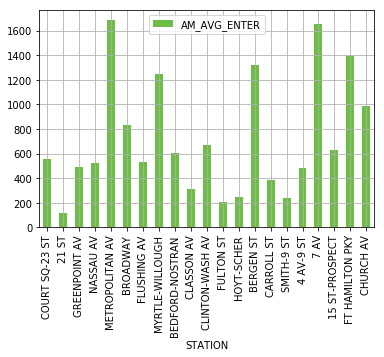

In [26]:
# graph G Train AM AVG ENTERS
plt = G_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#6CBE45')

plt.grid()

# save the fig
plt.figure.savefig('G-AM-enter.pdf')

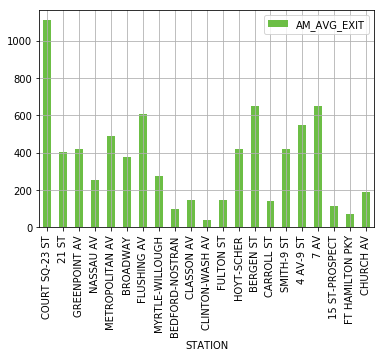

In [27]:
# graph G Train AM AVG EXITS
plt = G_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#6CBE45')
plt.grid()

# save the fig
plt.figure.savefig('G-AM-exit.pdf')